## output = activation_function( w1*x1 + w2*x2 + ... + wn*xn + bias )

In [95]:
# tensorflow+keras-->production environment

In [96]:
# Full demo (pytorch)

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


## Load & Preprocess Boston Dataset

In [116]:
data = pd.read_csv('../csv/Boston.csv')
# X = data.iloc[:,1:14].values
# y = data['medv'].values.reshape(-1, 1)

x=data.iloc[:,1:14].values
y = data['medv'].values.reshape(-1,1)


In [117]:
# scale
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [118]:
# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [119]:
# -------------------------------------------------------------
# CONVERT TO TENSORS
# PyTorch operations happen on tensors (CPU or GPU).
# -------------------------------------------------------------
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test,  dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test,  dtype=torch.float32)

print("Data loaded and preprocessed.")

Data loaded and preprocessed.


In [140]:
#layers
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(13, 64) #13 is the columns or features in data
        self.act1   = nn.ReLU()

        self.layer2 = nn.Linear(64, 64)
        self.act2   = nn.ReLU()

        self.out    = nn.Linear(64, 1)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.out(x)
        return x

In [141]:
model = SimpleMLP()
print(model)

SimpleMLP(
  (layer1): Linear(in_features=13, out_features=64, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (act2): ReLU()
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [142]:
# Instantiate Model, Loss, Optimizer
# Loss Function = MSE (Regression)
criterion = nn.MSELoss()

# Optimizer = Adam (Momentum + Adaptive LR)
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

print("\nModel, loss function, and optimizer ready.")


Model, loss function, and optimizer ready.


In [143]:
model.parameters

<bound method Module.parameters of SimpleMLP(
  (layer1): Linear(in_features=13, out_features=64, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (act2): ReLU()
  (out): Linear(in_features=64, out_features=1, bias=True)
)>

In [144]:
# -------------------------------------------------------------
# TRAINING LOOP — THE HEART OF PYTORCH
#
# This is where PyTorch shines:
# ✔ You see the forward pass
# ✔ You see backward pass
# ✔ You see optimizer step
# ✔ You can insert loops or if/else (dynamic graph)
# -------------------------------------------------------------

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):

    # -------------------------------
    # TRAIN MODE (dropout = ON)
    # -------------------------------
    model.train()

    # Forward pass (PyTorch builds computation graph dynamically)
    preds = model(X_train)

    # Compute training loss
    loss = criterion(preds, y_train)

    # Clear old gradients (PyTorch accumulates!)
    optimizer.zero_grad()

    # Backpropagation (computes gradients via chain rule)
    loss.backward()

    # Update weights using optimizer rule (Adam here)
    optimizer.step()

    # -------------------------------
    # VALIDATION (dropout = OFF)
    # -------------------------------
    
    model.eval()
    with torch.no_grad():  # disables autograd (faster)
        val_preds = model(X_test)
        val_loss = criterion(val_preds, y_test)

    # Save losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    # Print every 20 epochs
    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f}")

print("\nTraining complete.")
'''Example: print weights after each epoch
if epoch % 20 == 0:
    print("Weights after epoch", epoch)
    print(model.layer1.weight.data)'''

'''
Example: print weights after every batch
for batch_x, batch_y in dataloader:
    preds = model(batch_x)
    loss = criterion(preds, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(model.layer1.weight.data)   # batch-wise update

log gradient magnitudes per epoch
    print(model.layer1.weight.grad)
'''

Epoch 0 | Train Loss: 603.0225 | Val Loss: 515.2627
Epoch 20 | Train Loss: 89.4651 | Val Loss: 68.5836
Epoch 40 | Train Loss: 33.9673 | Val Loss: 32.9272
Epoch 60 | Train Loss: 24.7410 | Val Loss: 26.4650
Epoch 80 | Train Loss: 20.8910 | Val Loss: 23.3269
Epoch 100 | Train Loss: 18.2802 | Val Loss: 20.9860
Epoch 120 | Train Loss: 16.2588 | Val Loss: 19.1155
Epoch 140 | Train Loss: 14.6650 | Val Loss: 17.6563
Epoch 160 | Train Loss: 13.4260 | Val Loss: 16.4589
Epoch 180 | Train Loss: 12.4521 | Val Loss: 15.4665
Epoch 200 | Train Loss: 11.6684 | Val Loss: 14.6370
Epoch 220 | Train Loss: 11.0002 | Val Loss: 13.9282
Epoch 240 | Train Loss: 10.4132 | Val Loss: 13.3451
Epoch 260 | Train Loss: 9.8992 | Val Loss: 12.8389
Epoch 280 | Train Loss: 9.4361 | Val Loss: 12.4510
Epoch 300 | Train Loss: 9.0168 | Val Loss: 12.1469
Epoch 320 | Train Loss: 8.6203 | Val Loss: 11.9142
Epoch 340 | Train Loss: 8.2570 | Val Loss: 11.7173
Epoch 360 | Train Loss: 7.9216 | Val Loss: 11.5847
Epoch 380 | Train Loss

'\nExample: print weights after every batch\nfor batch_x, batch_y in dataloader:\n    preds = model(batch_x)\n    loss = criterion(preds, batch_y)\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n    print(model.layer1.weight.data)   # batch-wise update\n\nlog gradient magnitudes per epoch\n    print(model.layer1.weight.grad)\n'

## Plot Training vs Validation Loss

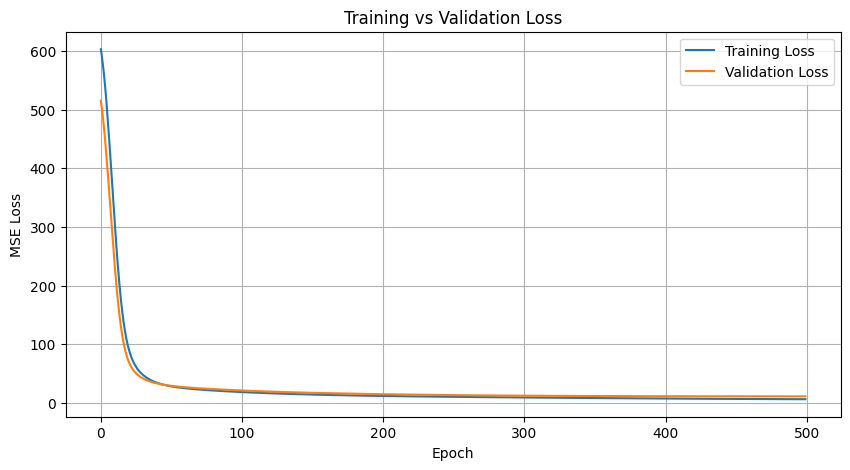

In [145]:
# -------------------------------------------------------------
# LOSS CURVES (Overfitting / Underfitting Check)
# -------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

# Interpretation:
# ✔ If both curves go down → learning
# ✔ If train << val → overfitting
# ✔ If both high → underfitting


In [146]:
r2_score(y_test,val_preds)

0.8469837307929993

In [147]:
for i in model.named_parameters():
    print(i)

('layer1.weight', Parameter containing:
tensor([[-6.2386e-02,  4.0419e-02, -1.0804e-01, -4.0752e-01, -6.4421e-02,
          1.5093e-01,  7.8192e-02, -6.3402e-03, -2.3654e-01, -1.0979e-01,
          1.0083e-01,  3.3104e-01,  2.7711e-02],
        [-3.8725e-01, -3.5280e-02,  1.6512e-01, -5.1997e-01,  3.2934e-01,
          2.1486e-01,  1.6212e-01, -2.5334e-01, -5.9741e-02, -5.2644e-02,
         -2.5968e-01,  1.2497e-01, -4.8195e-01],
        [-1.7520e-01, -2.0609e-01, -2.8281e-01,  2.9679e-01,  1.5989e-01,
          1.8577e-01, -2.7724e-01, -4.2790e-01, -8.0502e-02, -4.0950e-02,
         -1.5910e-01, -2.5124e-02, -1.5223e-01],
        [ 2.3327e-03, -2.0029e-01, -2.4464e-01,  3.0922e-01, -5.2613e-01,
         -9.9117e-02,  2.5107e-01, -2.9089e-01, -1.4877e-02, -2.8291e-01,
          1.4671e-01,  2.6536e-01,  1.6296e-01],
        [-2.1611e-01, -2.2494e-01, -1.4544e-01, -1.8390e-01, -1.4103e-01,
          3.0154e-01, -2.7730e-01, -2.9023e-01, -3.4020e-01, -1.0622e-01,
         -2.2083e-02,  6

In [148]:
model.layer1.weight.grad

tensor([[ 1.0440e-01, -1.0392e-01,  8.2431e-02,  7.2501e-02,  9.9103e-02,
         -8.8797e-02,  6.0258e-02, -1.1823e-01,  1.1960e-01,  6.3768e-02,
          1.0102e-01, -1.0403e-01,  5.2547e-02],
        [ 1.7614e-01, -2.5331e-02, -7.7436e-02, -5.0219e-02, -2.1591e-01,
         -1.9221e-01, -2.7254e-02,  7.1736e-02,  7.8249e-02,  9.6448e-03,
          2.6348e-01, -5.9975e-02,  2.0538e-01],
        [ 9.6550e-02, -6.2268e-02,  1.7917e-01,  2.1448e-02,  1.2106e-01,
         -1.5915e-01,  1.1588e-01, -7.1765e-02,  1.2114e-01,  1.5740e-01,
          1.1864e-01, -8.7776e-02,  1.2053e-01],
        [ 4.8446e-02,  1.0790e-01,  1.8949e-02, -6.1225e-01,  9.3752e-02,
         -1.6690e-01, -6.8252e-02,  5.2833e-02, -1.1128e-02,  5.7248e-02,
         -3.3257e-02, -1.9757e-01,  6.4237e-02],
        [ 1.7223e-01, -1.8977e-01,  1.9962e-01, -1.5159e-01,  2.2274e-01,
         -3.0831e-01,  1.8718e-01, -1.8659e-01,  2.2463e-01,  2.1035e-01,
          2.7648e-01, -7.4426e-02,  2.5034e-01],
        [ 9.632

In [149]:
# -------------------------------------------------------------
# VIEW RAW WEIGHT MATRICES BEFORE VISUALIZATIONS
# # 1) Each neuron has 13 weights (one per feature)
# 2) Weight > 0 → feature increases neuron activation
# 3) Weight < 0 → feature decreases activation
# 4) Larger magnitude → stronger influence
# 5) First layer weights are most interpretable
# -------------------------------------------------------------

print("\n======== FIRST LAYER WEIGHT MATRIX (6 neurons × 13 features) ========")
print(model.layer1.weight.data)

print("\n======== FIRST LAYER BIAS VECTOR (6 biases) ========")
print(model.layer1.bias.data)

print("\n======== SECOND LAYER WEIGHT MATRIX (6 × 6) ========")
print(model.layer2.weight.data)

print("\n======== OUTPUT LAYER WEIGHT VECTOR (1 × 6) ========")
print(model.out.weight.data)

print("\n======== OUTPUT LAYER BIAS ========")
print(model.out.bias.data)

# Notes :
# • The layer1 weight matrix is the most important for interpretation.
# • Each ROW = a neuron.
# • Each COLUMN = influence of one feature.
# • Later layers combine features learned by previous layers.



======== FIRST LAYER WEIGHT MATRIX (6 neurons × 13 features) ========
tensor([[-6.2386e-02,  4.0419e-02, -1.0804e-01, -4.0752e-01, -6.4421e-02,
          1.5093e-01,  7.8192e-02, -6.3402e-03, -2.3654e-01, -1.0979e-01,
          1.0083e-01,  3.3104e-01,  2.7711e-02],
        [-3.8725e-01, -3.5280e-02,  1.6512e-01, -5.1997e-01,  3.2934e-01,
          2.1486e-01,  1.6212e-01, -2.5334e-01, -5.9741e-02, -5.2644e-02,
         -2.5968e-01,  1.2497e-01, -4.8195e-01],
        [-1.7520e-01, -2.0609e-01, -2.8281e-01,  2.9679e-01,  1.5989e-01,
          1.8577e-01, -2.7724e-01, -4.2790e-01, -8.0502e-02, -4.0950e-02,
         -1.5910e-01, -2.5124e-02, -1.5223e-01],
        [ 2.3327e-03, -2.0029e-01, -2.4464e-01,  3.0922e-01, -5.2613e-01,
         -9.9117e-02,  2.5107e-01, -2.9089e-01, -1.4877e-02, -2.8291e-01,
          1.4671e-01,  2.6536e-01,  1.6296e-01],
        [-2.1611e-01, -2.2494e-01, -1.4544e-01, -1.8390e-01, -1.4103e-01,
          3.0154e-01, -2.7730e-01, -2.9023e-01, -3.4020e-01, -1.062

In [150]:
# -------------------------------------------------------------
# Pretty-print weight matrix in a clean human-readable format
# -------------------------------------------------------------

W = model.layer1.weight.detach().numpy()   # shape: (6 neurons × 13 features)

for neuron_idx, neuron_weights in enumerate(W, start=1):
    print(f"\nNeuron {neuron_idx} Weights (Feature influence):")
    print("-----------------------------------------------")
    for feature_idx, w in enumerate(neuron_weights, start=1):
        print(f"Feature {feature_idx:2d} : {w:+.4f}")



Neuron 1 Weights (Feature influence):
-----------------------------------------------
Feature  1 : -0.0624
Feature  2 : +0.0404
Feature  3 : -0.1080
Feature  4 : -0.4075
Feature  5 : -0.0644
Feature  6 : +0.1509
Feature  7 : +0.0782
Feature  8 : -0.0063
Feature  9 : -0.2365
Feature 10 : -0.1098
Feature 11 : +0.1008
Feature 12 : +0.3310
Feature 13 : +0.0277

Neuron 2 Weights (Feature influence):
-----------------------------------------------
Feature  1 : -0.3872
Feature  2 : -0.0353
Feature  3 : +0.1651
Feature  4 : -0.5200
Feature  5 : +0.3293
Feature  6 : +0.2149
Feature  7 : +0.1621
Feature  8 : -0.2533
Feature  9 : -0.0597
Feature 10 : -0.0526
Feature 11 : -0.2597
Feature 12 : +0.1250
Feature 13 : -0.4820

Neuron 3 Weights (Feature influence):
-----------------------------------------------
Feature  1 : -0.1752
Feature  2 : -0.2061
Feature  3 : -0.2828
Feature  4 : +0.2968
Feature  5 : +0.1599
Feature  6 : +0.1858
Feature  7 : -0.2772
Feature  8 : -0.4279
Feature  9 : -0.0805
Feat

In [151]:
import pandas as pd

W = model.layer1.weight.detach().numpy()
df = pd.DataFrame(W, 
                  index=[f"Neuron {i+1}" for i in range(W.shape[0])],
                  columns=[f"F{i+1}" for i in range(W.shape[1])])
df.style.format("{:+.4f}")


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
Neuron 1,-0.0624,+0.0404,-0.1080,-0.4075,-0.0644,+0.1509,+0.0782,-0.0063,-0.2365,-0.1098,+0.1008,+0.3310,+0.0277
Neuron 2,-0.3872,-0.0353,+0.1651,-0.5200,+0.3293,+0.2149,+0.1621,-0.2533,-0.0597,-0.0526,-0.2597,+0.1250,-0.4820
Neuron 3,-0.1752,-0.2061,-0.2828,+0.2968,+0.1599,+0.1858,-0.2772,-0.4279,-0.0805,-0.0409,-0.1591,-0.0251,-0.1522
Neuron 4,+0.0023,-0.2003,-0.2446,+0.3092,-0.5261,-0.0991,+0.2511,-0.2909,-0.0149,-0.2829,+0.1467,+0.2654,+0.1630
Neuron 5,-0.2161,-0.2249,-0.1454,-0.1839,-0.1410,+0.3015,-0.2773,-0.2902,-0.3402,-0.1062,-0.0221,+0.0618,-0.2965
Neuron 6,-0.2973,+0.2827,-0.0022,-0.2771,-0.1470,-0.0182,-0.2273,+0.0695,+0.0363,-0.1885,-0.1900,-0.1614,-0.2274
Neuron 7,-0.4238,-0.2512,-0.0340,+0.0630,+0.0427,+0.3138,+0.0038,+0.0587,-0.2080,-0.2013,+0.1306,-0.0671,-0.1058
Neuron 8,-0.3296,-0.2460,-0.3591,+0.0925,-0.2572,+0.3432,+0.1209,-0.1397,-0.0743,-0.0104,+0.1793,+0.0226,+0.0134
Neuron 9,-0.0240,+0.3939,+0.2381,-0.0549,-0.1312,+0.1122,+0.0861,-0.2952,+0.4784,+0.0280,+0.0372,-0.1059,-0.6467
Neuron 10,-0.0348,+0.3427,+0.3393,+0.2244,-0.3321,+0.3711,+0.0713,-0.3222,+0.3780,+0.0089,-0.1143,-0.1750,-0.2121


In [152]:
# NOW THE INTERPRETABILITY / DEBUGGING MODULE


In [153]:
# Visualize FIRST-LAYER WEIGHT HEATMAP

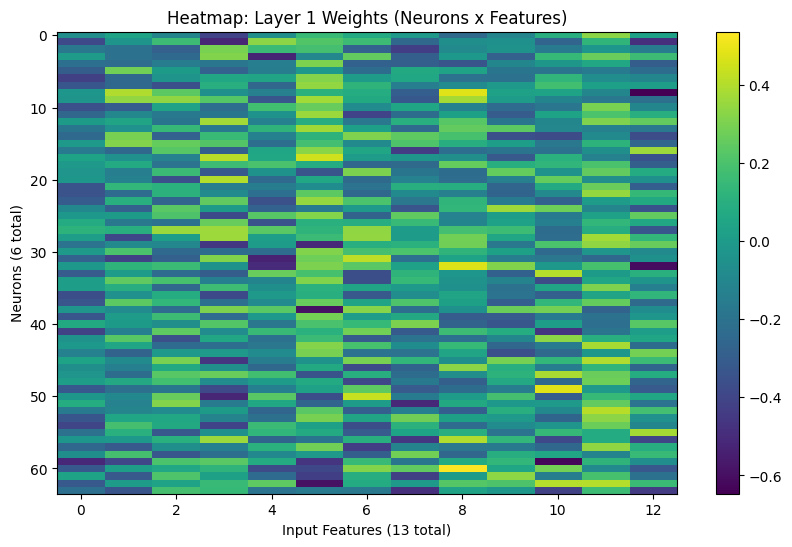

In [154]:
# -------------------------------------------------------------
# HEATMAP OF FIRST-LAYER WEIGHTS
# 6 neurons × 13 features
# Shows which features influence which neuron.
# -------------------------------------------------------------
W1 = model.layer1.weight.detach().numpy()

plt.figure(figsize=(10,6))
plt.imshow(W1, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Heatmap: Layer 1 Weights (Neurons x Features)")
plt.xlabel("Input Features (13 total)")
plt.ylabel("Neurons (6 total)")
plt.show()

# Interpretation:
# ✔ Bright (yellow) = strong positive influence
# ✔ Dark (purple)  = strong negative influence
# ✔ Middle = weak influence


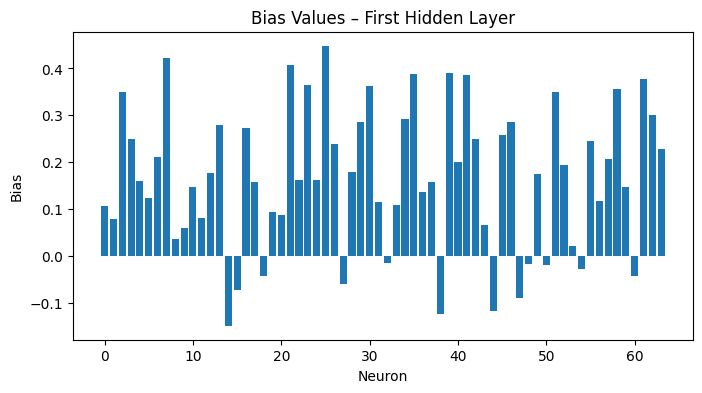

In [155]:
# -------------------------------------------------------------
# BIAS VISUALIZATION
# Bias shifts neuron activation threshold.
# -------------------------------------------------------------
b1 = model.layer1.bias.detach().numpy()

plt.figure(figsize=(8,4))
plt.bar(np.arange(len(b1)), b1)
plt.title("Bias Values – First Hidden Layer")
plt.xlabel("Neuron")
plt.ylabel("Bias")
plt.show()

# Interpretation:
# ✔ Large bias → neuron tends to activate often
# ✔ Negative bias → neuron needs strong input to activate


In [156]:
model.layer1.register_forward_hook

<bound method Module.register_forward_hook of Linear(in_features=13, out_features=64, bias=True)>

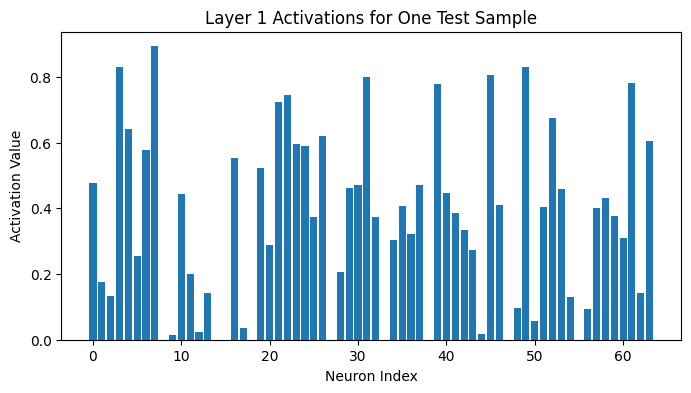

In [157]:
# -------------------------------------------------------------
# ACTIVATION VISUALIZATION
# PyTorch lets you "hook" into any layer.
# Shows actual ReLU outputs of neurons.
# -------------------------------------------------------------
activations = {}

def hook_fn(module, input, output):
    activations['act1'] = output.detach()

# Attach hook to layer1
hook = model.act1.register_forward_hook(hook_fn)

# Run forward pass on a sample
sample = X_test[5].unsqueeze(0)
_ = model(sample)

plt.figure(figsize=(8,4))
plt.bar(np.arange(len(activations['act1'].flatten())), 
        activations['act1'].flatten().numpy())
plt.title("Layer 1 Activations for One Test Sample")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Value")
plt.show()

hook.remove()

# Interpretation:
# ✔ Values > 0 → neuron active (ReLU)
# ✔ Values = 0 → neuron inactive (could be dead if always 0)

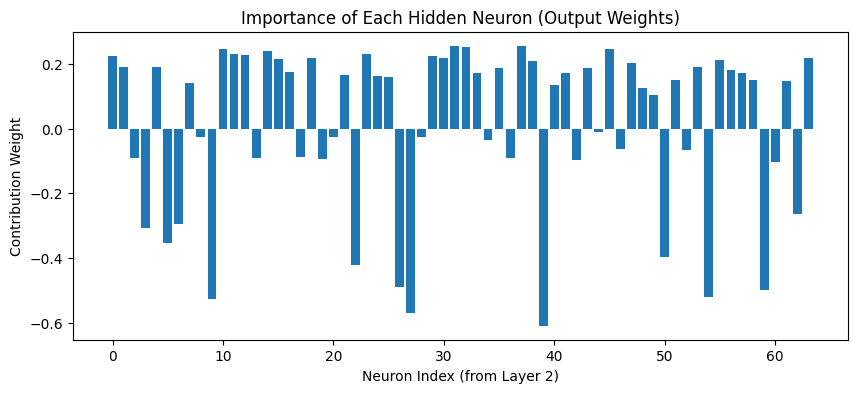

In [158]:
# -------------------------------------------------------------
# HOW MUCH EACH HIDDEN NEURON CONTRIBUTES TO FINAL PRICE
# (Output layer weights)
# -------------------------------------------------------------
Wout = model.out.weight.detach().numpy().flatten()

plt.figure(figsize=(10,4))
plt.bar(np.arange(len(Wout)), Wout)
plt.title("Importance of Each Hidden Neuron (Output Weights)")
plt.xlabel("Neuron Index (from Layer 2)")
plt.ylabel("Contribution Weight")
plt.show()

# Interpretation:
# ✔ Large positive → increases predicted price
# ✔ Large negative → decreases predicted price
# ✔ Near zero → neuron barely affects prediction


In [159]:
# -------------------------------------------------------------
# DETECT DEAD NEURONS
# If weights ~ 0 or activations ~ 0 repeatedly → dead ReLU.
# -------------------------------------------------------------
dead = (np.abs(W).sum(axis=1) < 1e-4)
print("Dead neurons in layer 1:", np.where(dead)[0])

Dead neurons in layer 1: []


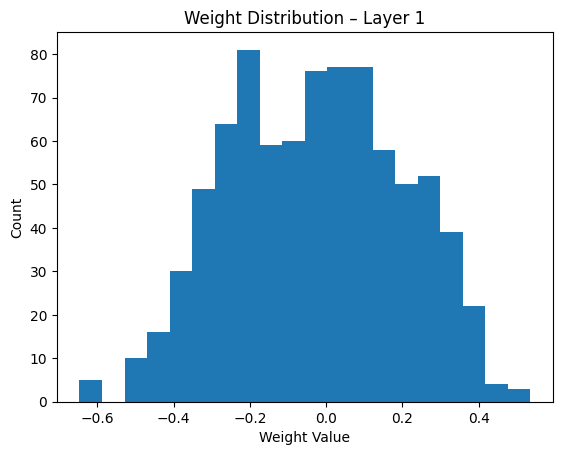

Max weight: 0.6467381
Min weight: 0.00042724772


In [160]:
# -------------------------------------------------------------
# WEIGHT DISTRIBUTION
# Helps detect exploding or vanishing weights.
# -------------------------------------------------------------
plt.hist(W1.flatten(), bins=20)
plt.title("Weight Distribution – Layer 1")
plt.xlabel("Weight Value")
plt.ylabel("Count")
plt.show()

print("Max weight:", np.max(np.abs(W1)))
print("Min weight:", np.min(np.abs(W1)))

# Interpretation:
# ✔ Wide distribution → learning many patterns (good)
# ✔ Very large weights → overfitting risk
# ✔ All near zero → underfitting / dead network

In [161]:
model.eval()

sample = X_test[5].unsqueeze(0)
with torch.no_grad():
    pred = model(sample)

print("Predicted:", pred.item(), "Actual:", y_test[5].item())

Predicted: 20.363473892211914 Actual: 20.0


In [162]:
# Predict Full Test Set

In [163]:
with torch.no_grad():
    preds = model(X_test).numpy().flatten()

df_compare = pd.DataFrame({
    "Predicted": preds,
    "Actual": y_test.numpy().flatten()
})

df_compare.head()

,Predicted,Actual
0,27.614775,23.600000
1,35.291046,32.400002
2,15.595518,13.600000
3,25.230034,22.799999
4,16.386562,16.100000


In [164]:
np.array([[2,4],[5,7]]).flatten()

array([2, 4, 5, 7])

In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
np.sqrt(mean_squared_error(y_test,preds))

np.float64(3.3498150731756966)

In [167]:
preds.shape

(102,)

In [168]:
y_test.shape

torch.Size([102, 1])

In [169]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()

        # Layer 1
        self.layer1 = nn.Linear(13, 64)
        self.bn1    = nn.BatchNorm1d(64)
        self.act1   = nn.ReLU()
        self.drop1  = nn.Dropout(p=0.01)

        # Layer 2
        self.layer2 = nn.Linear(64, 64)
        self.bn2    = nn.BatchNorm1d(64)
        self.act2   = nn.ReLU()
        self.drop2  = nn.Dropout(p=0.01)

        # Output
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        # Layer 1
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.drop1(x)

        # Layer 2
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.drop2(x)

        # Output layer (NO BN / NO activation for regression)
        x = self.out(x)
        return x

In [170]:
# EARLY STOPPING

In [171]:
import copy

class EarlyStopping:
    def __init__(self, patience=20, min_delta=0.0):
        """
        patience: how many epochs to wait for improvement
        min_delta: minimum improvement in validation loss to qualify
        """
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.wait = 0
        self.best_state = None
        self.stop = False

    def __call__(self, val_loss, model):
        # Did val_loss improve?
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.best_state = copy.deepcopy(model.state_dict())
            self.wait = 0
        else:
            self.wait += 1

        # Should we stop?
        if self.wait >= self.patience:
            self.stop = True

In [172]:
early_stopper = EarlyStopping(patience=35, min_delta=0.05)

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):

    model.train()
    preds = model(X_train)
    loss = criterion(preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test)
        val_loss = criterion(val_preds, y_test)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    print(f"Epoch {epoch} | Train: {loss.item():.4f} | Val: {val_loss.item():.4f}")

    # Early stopping check
    early_stopper(val_loss.item(), model)

    if early_stopper.stop:
        print("Early stopping triggered!")
        break

# Restore best model
print("Restoring best model weights...")
model.load_state_dict(early_stopper.best_state)

Epoch 0 | Train: 6.2085 | Val: 10.9756
Epoch 1 | Train: 6.2344 | Val: 11.3302
Epoch 2 | Train: 6.2564 | Val: 10.9979
Epoch 3 | Train: 6.2517 | Val: 11.3016
Epoch 4 | Train: 6.2192 | Val: 10.9753
Epoch 5 | Train: 6.1757 | Val: 11.1959
Epoch 6 | Train: 6.1257 | Val: 10.9307
Epoch 7 | Train: 6.0858 | Val: 11.0788
Epoch 8 | Train: 6.0445 | Val: 10.9002
Epoch 9 | Train: 6.0188 | Val: 11.0126
Epoch 10 | Train: 5.9908 | Val: 10.8759
Epoch 11 | Train: 5.9706 | Val: 10.9619
Epoch 12 | Train: 5.9484 | Val: 10.8610
Epoch 13 | Train: 5.9326 | Val: 10.9324
Epoch 14 | Train: 5.9148 | Val: 10.8463
Epoch 15 | Train: 5.9019 | Val: 10.9135
Epoch 16 | Train: 5.8868 | Val: 10.8447
Epoch 17 | Train: 5.8779 | Val: 10.8916
Epoch 18 | Train: 5.8658 | Val: 10.8395
Epoch 19 | Train: 5.8568 | Val: 10.8806
Epoch 20 | Train: 5.8451 | Val: 10.8522
Epoch 21 | Train: 5.8397 | Val: 10.8651
Epoch 22 | Train: 5.8289 | Val: 10.8554
Epoch 23 | Train: 5.8256 | Val: 10.8595
Epoch 24 | Train: 5.8166 | Val: 10.8694
Epoch 25 |

<All keys matched successfully>

In [173]:
model.eval()

SimpleMLP(
  (layer1): Linear(in_features=13, out_features=64, bias=True)
  (act1): ReLU()
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (act2): ReLU()
  (out): Linear(in_features=64, out_features=1, bias=True)
)

In [174]:
with torch.no_grad():
    preds = model(X_test).numpy()

In [175]:
model.layer1.weight

Parameter containing:
tensor([[-6.6738e-02,  3.6579e-02, -1.0144e-01, -4.1138e-01, -5.7401e-02,
          1.7256e-01,  8.2336e-02, -8.6365e-04, -2.1899e-01, -7.6818e-02,
          1.0352e-01,  3.4980e-01,  3.4231e-02],
        [-4.2969e-01, -4.4364e-02,  1.6505e-01, -5.1810e-01,  3.6849e-01,
          1.8852e-01,  1.3829e-01, -2.3878e-01, -6.9298e-02, -5.2079e-02,
         -2.5138e-01,  7.6840e-02, -5.0206e-01],
        [-1.8147e-01, -2.1482e-01, -2.9320e-01,  3.0986e-01,  1.4889e-01,
          1.8564e-01, -2.7549e-01, -4.1505e-01, -7.4808e-02, -4.8724e-02,
         -1.4888e-01, -1.9973e-02, -1.3170e-01],
        [ 2.4359e-02, -2.2278e-01, -2.4527e-01,  3.2667e-01, -5.7920e-01,
         -1.3517e-01,  2.4951e-01, -2.7410e-01,  1.9284e-02, -2.6635e-01,
          1.9051e-01,  2.2994e-01,  1.4944e-01],
        [-2.2453e-01, -2.3201e-01, -1.4144e-01, -1.8327e-01, -1.4998e-01,
          3.0431e-01, -2.7955e-01, -2.7911e-01, -3.4044e-01, -1.0448e-01,
         -1.9987e-02,  3.6217e-02, -2.8524